<a href="https://colab.research.google.com/github/Sha-98/Data-Science-Masters/blob/main/MySQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MySQL**

##  ***What is SQL?***

SQL is a programming language specifically designed for managing and manipulating relational databases. It provides a standardized way to interact with databases, enabling users to perform tasks such as querying data, updating data, inserting data, and deleting data. SQL is used across a wide range of database management systems (DBMS), including popular ones like MySQL, PostgreSQL, SQL Server, and Oracle.

Key components of SQL include:

* ***Data Query Language (DQL):*** Used to retrieve data from the database. The most common DQL command is SELECT.

* ***Data Definition Language (DDL):*** Involves the definition and management of database structures. Commands like CREATE, ALTER, and DROP fall under DDL.

* ***Data Manipulation Language (DML):*** Involves the manipulation of data stored in the database. Commands like INSERT, UPDATE, and DELETE are part of DML.

* ***Data Control Language (DCL):*** Manages access to data within the database. Commands like GRANT and REVOKE are used for this purpose.

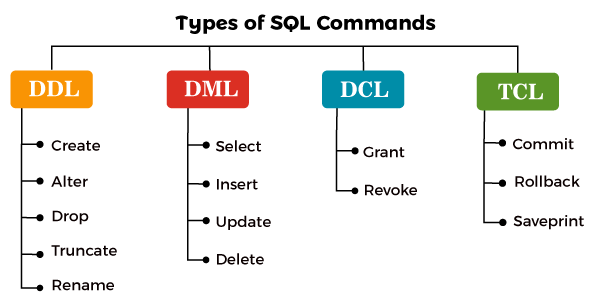

## ***Order of Query Execution***

Everytime we learn a new language, we learn the order of words we should follow. In mathematics also, we learnt about BODMAS, the order of mathematical operations in a mathematical equation, based on which all calculations are done. In similar manner, we also have the order of SQL commands in a query. The correct order is mentioned below:

* ***FROM:*** Specifies the tables from which the data will be retrieved.

* ***WHERE:*** Filters the rows based on a specified condition.

* ***GROUP BY:*** Groups rows that have the same values into summary rows, like "total" or "average."

* ***HAVING:*** Filters the results of the GROUP BY clause based on a specified condition.

* ***SELECT:*** Specifies the columns that you want to retrieve.

* ***ORDER BY:*** Sorts the result set based on one or more columns.

* ***LIMIT/OFFSET (or FETCH):*** Limits the number of rows returned by the query, or skips a specified number of rows.

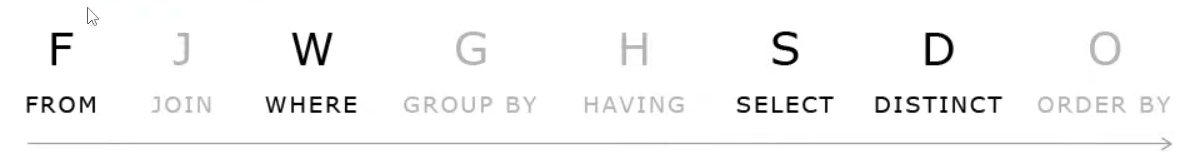

A typical sequence of a SELECT query is as follows:


In [ ]:
# SELECT [columns]
# FROM [table]
# WHERE [condition]
# GROUP BY [columns]
# HAVING [condition]
# ORDER BY [columns]
# LIMIT [count] OFFSET [offset];

***It's important to note that not every query will include all of these clauses. The actual order of execution might be optimized by the database engine, but understanding the logical order helps in writing and debugging complex queries.***

##  ***Difference between "WHERE" and "HAVING"***

***01.WHERE Clause***
* Used with the "SELECT," "UPDATE," and "DELETE" statements.
* Applied before the result set is formed, during the retrieval or modification of data.
* Filters rows based on conditions applied to columns.
* Typically used for filtering individual rows based on non-aggregated column values.

An Example of a query with "WHERE" clause is given below:



In [ ]:
# SELECT first_name, last_name, age
# FROM teachers
# WHERE age > 50;

***02. HAVING Clause***

* Used with the "GROUP BY" clause in the "SELECT" statement.
* Applied after the result set is formed, during the grouping of data.
* Filters groups based on conditions applied to aggregated column values (e.g., SUM, COUNT).
* Used when filtering on aggregated data.

An example query for this one is as given below:

In [ ]:
# SELECT column1, SUM(column2) as total
# FROM table
# GROUP BY column1
# HAVING total > 1000;

***In summary, "WHERE" is used for filtering individual rows based on non-aggregated column values, while "HAVING" is used for filtering groups based on aggregated column values.***

##  ***Referential Action***

Referential actions are rules defined on foreign key constraints to specify what action should be taken when a referenced or parent row in the primary key table is modified or deleted. These actions help maintain referential integrity between tables.

There are 4 types of referential actions:
1. CASCADE
2. SET NULL
3. SET DEFAULT
4. NO ACTION / RESTRICT

We'll discuss these with examples in this article.

**01. CASCADE**

When a referenced row is updated or deleted, the corresponding rows in the child table are also updated or deleted, which is called or known as 'cascading' the changes.

Cascading referential action is very well used in companies which holds the user data in there database such as Zomato, or Amazon. These companies cascade our password details everytime we change it. And that is how, the feature of update password, or email, or phone number actually runs on the database sustaining the credibility and consistency of the database and running the company which solely lie on that customers.

An example of using CASCADING command as a referential action in your SQL query can be given as follows:



In [ ]:
# CREATE TABLE authors (
#     author_id INT PRIMARY KEY,
#     author_name VARCHAR(255)
# );

# CREATE TABLE books (
#     book_id INT PRIMARY KEY,
#     title VARCHAR(255),
#     author_id INT,
#     FOREIGN KEY (author_id) REFERENCES authors(author_id) ON UPDATE CASCADE ON DELETE CASCADE
# );

**02. SET NULL**

When a referred row is updated, the foreign key in the child table is set to NULL. If the referenced row is deleted, the corresponding foreign key is also set to NULL.

With this way, if any one reference is updated, the other is changes to NULL which actually creates inconsistency in the data. However, in some usecases, this referential action is the solution. One of such use cases is updating the department id of a employee. If an employee is promoted and shifted to some other department, it should be updated in the database, and in that case, the older department must get a NULL seat as there is a transfer of resourse and not the addition.

The code for this query is given as follows:

In [ ]:
# CREATE TABLE departments (
#     department_id INT PRIMARY KEY,
#     department_name VARCHAR(255)
# );

# CREATE TABLE employees (
#     employee_id INT PRIMARY KEY,
#     employee_name VARCHAR(255),
#     department_id INT,
#     FOREIGN KEY (department_id) REFERENCES departments(department_id) ON UPDATE SET NULL ON DELETE SET NULL
# );

**03. SET DEFAULT**

Another referential command is 'SET DEFAULT'. This one is similar to 'SET NULL', but the foreign key is set to its default value when the referenced row is updated or deleted.

In this one, we are only making changes in the referenced row, and that change is impacting the foreign key making it to the default value as mentioned by the database administrator at the time of database creation.

An example query for this one is also given below:

In [ ]:
# CREATE TABLE suppliers (
#     supplier_id INT PRIMARY KEY,
#     supplier_name VARCHAR(255)
# );

# CREATE TABLE products (
#     product_id INT PRIMARY KEY,
#     product_name VARCHAR(255),
#     supplier_id INT DEFAULT 1,
#     FOREIGN KEY (supplier_id) REFERENCES suppliers(supplier_id) ON UPDATE SET DEFAULT ON DELETE SET DEFAULT
# );

**04. NO ACTION/RESTRICT**

The last one is the default behaviour. It prefents the update or deletion of a referenced row if there are corresponding rows in the child table. The usecase of such referential action can be the change in such attributes of your database, changes in which are not affordable at all. An example can be the deletion of any data in the column department_id of the table departments. We shall associate the RESTRICT referential action with such commands to avoid any harmful mistakes which might cost you your entire business.

Another example for this referential action in SQL query is given below:

In [ ]:
# CREATE TABLE countries (
#     country_id INT PRIMARY KEY,
#     country_name VARCHAR(255)
# );

# CREATE TABLE cities (
#     city_id INT PRIMARY KEY,
#     city_name VARCHAR(255),
#     country_id INT,
#     FOREIGN KEY (country_id) REFERENCES countries(country_id) ON UPDATE NO ACTION ON DELETE NO ACTION
# );

***The referential actions help ensure that relationships between tables are maintained, and changes in one table do not comprimise the integrity of the entire database.***

##  ***What are SQL JOINS***

In SQL, a JOIN operation combines rows from two or more tables based on a related column between them. Joins are essential for retrieving data from multiple tables and are used to establish relationships between tables.

General syntax of writing a query with a JOIN is as follows:



In [ ]:
SELECT *
FROM table1
'JOIN NAME (without inverted commas)' table2;

In [ ]:
SELECT employees.employee_name, departments.department_name
FROM employees
RIGHT JOIN departments ON employees.department_id = departments.department_id;

There are several types of joins we will be discussing, but before that, why do we actually need to use JOINS? Why do we not keep all our data in one single table and use it whenever we need?

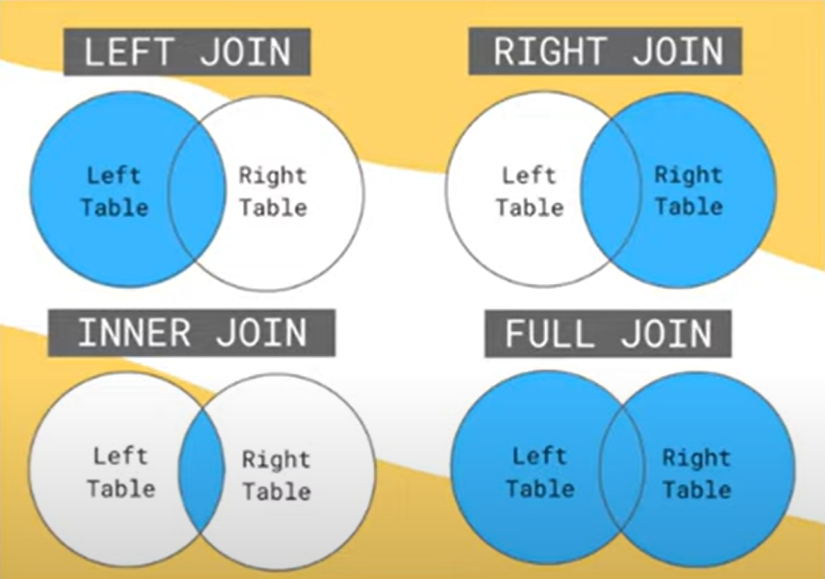

### ***Why do we use relational database and do not keep all data in one single table?***

To answer this naive question we have several strong solid reasoning. Relational databases are designed based on the principles of the relational model, which was proposed early in 1970s.

The key idea behind this design of a database was to organize and manage data in a structured way to ensure data integrity, reduce redundancy, and facilitate efficient querying and retrieval of information. The use of multiple tables, as opposed to a single table, offers several advantages such as:

01. Elimination of Redundancy
02. Data Integrity
03. Flexibility and Modularity
04. Efficient and Optimized Querying
05. Improved Readability and Maintainability
06. Scalability

And more...

The approach of using multiple tables in a database and connect them through relations aligns with the principles of RDBMS and privides robust foundation for managing and querying data in a systematic and scalable manner.



### ***SQL Joins with Examples***

***01. CROSS JOIN or Cartesian Join***

A CROSS JOIN in SQL, or the Cartesian product in other words is a type of join where each row from the first table is combined with every other row from the second table, eactly what the word "cartesian product" mean in mathematics. The result set of a CROSS JOIN is the total number of rows in the first table multiplied by the total number of rows in the second table.

An example for this JOIN can be taken as,

Consider two tables, "employees" and "departments," with no common column between them:

In [ ]:
CREATE TABLE employees (
    employee_id INT,
    employee_name VARCHAR(50)
);

CREATE TABLE departments (
    department_id INT,
    department_name VARCHAR(50)
);

INSERT INTO employees VALUES (1, 'John'), (2, 'Jane');
INSERT INTO departments VALUES (101, 'HR'), (102, 'IT');

If we perform a CROSS JOIN between these tables, we get:

In [ ]:
SELECT *
FROM employees
CROSS JOIN departments;

In [ ]:
+-------------+---------------+----------------+-------------------+
| employee_id | employee_name | department_id | department_name  |
+-------------+---------------+----------------+-------------------+
| 1           | John          | 101            | HR                |
| 1           | John          | 102            | IT                |
| 2           | Jane          | 101            | HR                |
| 2           | Jane          | 102            | IT                |
+-------------+---------------+----------------+-------------------+

CROSS JOINs can be resource-intensive, especially when dealing with large tables, as the result set size is the product of the row counts in the joined tables. Therefore, it's essential to use CROSS JOIN judiciously and to be aware of its potential impact on performance.

***02. INNER JOIN with Example***

An INNER JOIN in SQL is used to combine rows from two or more tables based on related column between them on basis of a condition. It returns us only the rows that have matching values in both tables. An example can be discussed as:

Consider two tables: employees and departments.

In [ ]:
CREATE TABLE employees (
    employee_id INT PRIMARY KEY,
    employee_name VARCHAR(50),
    department_id INT
);

CREATE TABLE departments (
    department_id INT PRIMARY KEY,
    department_name VARCHAR(50)
);

INSERT INTO employees VALUES (1, 'John', 101), (2, 'Jane', 102), (3, 'Bob', 101);

INSERT INTO departments VALUES (101, 'HR'), (102, 'IT');


Now, if we want to retrieve a list of employees with their corresponding department names, you can use an INNER JOIN:

In [ ]:
SELECT employees.employee_id, employees.employee_name, departments.department_name
FROM employees
INNER JOIN departments ON employees.department_id = departments.department_id;

In this example, the ON clause specifies the condition for the INNER JOIN, where employees.department_id should be equal to departments.department_id. The result will include only those rows where there is a match between the department_id values in both tables.

The result of the query would be:

In [ ]:
+-------------+---------------+-------------------+
| employee_id | employee_name | department_name   |
+-------------+---------------+-------------------+
| 1           | John          | HR                |
| 2           | Jane          | IT                |
| 3           | Bob           | HR                |
+-------------+---------------+-------------------+

In this result set, we can see that John and Bob belong to the HR department, and Jane belongs to the IT department.

***The INNER JOIN excludes any rows where there is no match in both tables.***

***03. LEFT JOIN with Example***

A LEFT JOIN, also known as a LEFT OUTER JOIN, in SQL is used to retrieve all rows from the left table and the matching rows from the right table. If there is no match in the right table, NULL values are returned for columns from the right table.

An example using the same employees and departments tables can be seen as follows:

In [ ]:
SELECT employees.employee_id, employees.employee_name, departments.department_name
FROM employees
LEFT JOIN departments ON employees.department_id = departments.department_id;

In this example, the ON clause specifies the condition for the LEFT JOIN, where employees.department_id should be equal to departments.department_id.

The result will include all rows from the employees table, and for each row, it will try to find a match in the departments table based on the department_id.

If a match is found, the corresponding department_name is included in the result. If there is no match, NULL values are returned for the columns from the departments table.

The result might look something like this:

In [ ]:
+-------------+---------------+-------------------+
| employee_id | employee_name | department_name   |
+-------------+---------------+-------------------+
| 1           | John          | HR                |
| 2           | Jane          | IT                |
| 3           | Bob           | HR                |
| 4           | Joy           | NULL              |
+-------------+---------------+-------------------+

In this result set, we can see that John and Bob have department information, but there is no corresponding department for Joy in the departments table. However, Joy is still included in the result with NULL values for the department_name column.

The LEFT JOIN is useful when you want to retrieve all records from the left table, regardless of whether there is a match in the right table. It helps to include unmatched rows with NULL values, providing a more comprehensive view of the data.

***04. RIGHT JOIN with Example***

A RIGHT JOIN, also known as a RIGHT OUTER JOIN, in SQL is used to retrieve all rows from the right table and the matching rows from the left table. If there is no match in the left table, NULL values are returned for columns from the left table.

An example using the same employees and departments tables:

In [ ]:
SELECT employees.employee_id, employees.employee_name, departments.department_name
FROM employees
RIGHT JOIN departments ON employees.department_id = departments.department_id;

In this example, the ON clause again specifies the condition for the RIGHT JOIN, where employees.department_id should be equal to departments.department_id.

The result will include all rows from the departments table, and for each row, it will try to find a match in the employees table based on the department_id.

If a match is found, the corresponding employee_id and employee_name are included in the result. If there is no match, NULL values are returned for the columns from the employees table.

The result for our code can be something like this:

In [ ]:
+-------------+---------------+-------------------+
| employee_id | employee_name | department_name   |
+-------------+---------------+-------------------+
| 1           | John          | HR                |
| 2           | Jane          | IT                |
| 3           | Bob           | HR                |
| NULL        | NULL          | FINANCE           |
+-------------+---------------+-------------------+

In this result set, you can see that it includes all departments from the departments table. For each department, it includes the corresponding employee information if there is a match in the employees table. However, there is no information for the IT department in the employees table, so the employee_id and employee_name columns show NULL values for that department.

The RIGHT JOIN is less commonly used than INNER JOIN or LEFT JOIN, but it can be useful in certain scenarios where you want to retrieve all records from the right table, regardless of whether there is a match in the left table.

***05. FULL JOIN with Example***

A FULL JOIN, also known as a FULL OUTER JOIN, in SQL is used to retrieve all rows from both the left and right tables, with NULL values filled in for columns where there is no match.

An example using the same employees and departments tables:

In [ ]:
SELECT employees.employee_id, employees.employee_name, departments.department_name
FROM employees
FULL JOIN departments ON employees.department_id = departments.department_id;

In this example, the ON clause specifies the condition for the FULL JOIN, where employees.department_id should be equal to departments.department_id.

The result will include all rows from both the employees and departments tables. If there is a match, it includes the corresponding employee_id and employee_name along with the department_name.

If there is no match in either the left or right table, NULL values are returned for the columns from the table with no match.

In [ ]:
+-------------+---------------+-------------------+
| employee_id | employee_name | department_name   |
+-------------+---------------+-------------------+
| 1           | John          | HR                |
| 2           | Jane          | IT                |
| 3           | Bob           | HR                |
| 4           | Joy           | NULL              |
| NULL        | NULL          | FINANCE           |
+-------------+---------------+-------------------+

In this result set, you can see that it includes all employees and all departments. For each employee, it includes the corresponding department information if there is a match. If there is no match in the left table (employees), NULL values are returned for the employee_id and employee_name. If there is no match in the right table (departments), NULL values are returned for the department_name.

The FULL JOIN is less common than INNER JOIN, LEFT JOIN, or RIGHT JOIN, but it is useful when you want to include all rows from both tables in the result, providing a comprehensive view of the data. Also, we cannot perform a FULL OUTER JOIN in MySQL directly as we can do with RIGHT JOIN or LEFT JOIN or any other JOIN we learnt till now. For this, we have to learn one more concept in SQL i.e., SET OPERATIONS

## ***Set Operations in SQL***

SET operations in SQL allows us to combine the results of two or more queries into a single result set. The main set operations are

01. UNION
02. UNION ALL
03. INTERSECT
04. EXCEPT or MINUS (depending on the database system we are working on)

We will discuss these operations one by one with examples to understand their functioning and differences.

***01. UNION Set Operation***

This set operation combines the result set of two queries while eliminating the duplicate rows from the final set. One condition to perform this query without an error is that, the columns in the SELECT lists of both the queries must be the same data type and in the same order.

An example for this can be:

In [ ]:
# SELECT person_id, name FROM table1
# UNION
# SELECT person_id, name FROM table2;

In [ ]:
# table1:-
# +-------------+---------------+
# | person_id   | name          |
# +-------------+---------------+
# | 1           | John          |
# | 2           | Jane          |
# | 3           | Bob           |
# +-------------+---------------+

# table2:-
# +-------------+---------------+
# | person_id   | name          |
# +-------------+---------------+
# | 3           | Bob           |
# | 4           | Jay           |
# | 5           | Ray           |
# +-------------+---------------+

# UNION of table1 and table2
# +-------------+---------------+
# | person_id   | name          |
# +-------------+---------------+
# | 1           | John          |
# | 2           | Jane          |
# | 3           | Bob           |
# | 4           | Jay           |
# | 5           | Ray           |
# +-------------+---------------+


In this example, we have 2 tables with similar columns as person_id and name. However, one row is similar or common in both these table. Now, on performing the set operation UNION on these two tables, we got the result table with a total of 5 records, which means the duplicate records were treated by the computer iteself.

***02. UNION ALL Set Operation***

Another set operation is UNION ALL, where, we see that the compiler gives fetch the duplicate rows also. Which means, when we use UNION ALL instead of UNION, we get all the records including the duplicate ones. An example for this can be seen as follows:

In [ ]:
# SELECT person_id, name FROM table1
# UNION ALL
# SELECT person_id, name FROM table2;

In [ ]:
# table1:-
# +-------------+---------------+
# | person_id   | name          |
# +-------------+---------------+
# | 1           | John          |
# | 2           | Jane          |
# | 3           | Bob           |
# +-------------+---------------+

# table2:-
# +-------------+---------------+
# | person_id   | name          |
# +-------------+---------------+
# | 3           | Bob           |
# | 4           | Jay           |
# | 5           | Ray           |
# +-------------+---------------+

# UNION ALL of table1 and table2
# +-------------+---------------+
# | person_id   | name          |
# +-------------+---------------+
# | 1           | John          |
# | 2           | Jane          |
# | 3           | Bob           |
# | 3           | Bob           |
# | 4           | Jay           |
# | 5           | Ray           |
# +-------------+---------------+


As seen, the data of person with name 'Bob' is printed twice because this data is present in both the tables. This is the difference between UNION and UNION ALL set operation.

***03. INTERSECT Set Operation***

The INTERSECT operation return only the common rows between the result sets of the  two queries. In this one also, the columns in the SELECT lists of both queries must be of the same data type and in the same order.

The result of this operation on our example data set would be as follows:

In [ ]:
# SELECT person_id, name FROM table1
# INTERSECT
# SELECT person_id, name FROM table2;

In [ ]:
table1:-
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 1           | John          |
| 2           | Jane          |
| 3           | Bob           |
+-------------+---------------+

table2:-
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 3           | Bob           |
| 4           | Jay           |
| 5           | Ray           |
+-------------+---------------+

INTERSECT of table1 and table2
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 3           | Bob           |
+-------------+---------------+


***04. EXCEPT or MINUS Set Operation***

This one returns the rows that are unique to the result set of the first query, excluding those that appear in the second query. In this operation we can set the query as per the need of the result we want.

Columns in the SELECT list of both queries must be of the same data type and in the same order for this one as well.

The examples for this operation are as follows:

In [ ]:
# SELECT person_id, name FROM table1
# EXCEPT
# SELECT person_id, name FROM table2;

In [ ]:
table1:-
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 1           | John          |
| 2           | Jane          |
| 3           | Bob           |
+-------------+---------------+

table2:-
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 3           | Bob           |
| 4           | Jay           |
| 5           | Ray           |
+-------------+---------------+

EXCEPT of table1 and table2
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 1           | John          |
| 2           | Jane          |
+-------------+---------------+

OR

In [ ]:
# SELECT person_id, name FROM table2
# EXCEPT
# SELECT person_id, name FROM table1;

In [ ]:
table1:-
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 1           | John          |
| 2           | Jane          |
| 3           | Bob           |
+-------------+---------------+

table2:-
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 3           | Bob           |
| 4           | Jay           |
| 5           | Ray           |
+-------------+---------------+

EXCEPT of table2 and table1
+-------------+---------------+
| person_id   | name          |
+-------------+---------------+
| 4           | Jay           |
| 5           | Ray           |
+-------------+---------------+

The EXCEPT operator returns rows that exist in the first SELECT statement but not in the second one.

***These set operations are useful for combining, comparing, and analyzing data from different tables or queries. Always ensure that the data types and column orders are compatible when using these operations.***

Now, coming back to JOINS, we said we cannot perform FULL OUTER JOIN normally in SQL. So, to get the result for full outer join, we may use the set operation UNION to get all the unique data from both the table we want to perform join on. This way, we get the result of FULL OUTER JOIN on our data through Set Operation UNION.

***06. SELF JOIN with Example***

A SELF JOIN is a unique type of join where we are joining a table with itself. This is useful when we want to combine rows from the same table based on a related column. This is little tricky to understand, but bear with me and keep reading, we'll try to understand this one with a detailed example.

To perform a self join, we use a table alias to differentiate between the two instances of the same table. Let's see how this is done with an example.

Let's say we have a table called 'employee' with the following structure:

In [ ]:
# CREATE TABLE employees (
#     employee_id INT PRIMARY KEY,
#     employee_name VARCHAR(50),
#     manager_id INT
# );

In this table, the 'manager_id' column referes to the 'employee_id' of the manager. Now, we want to retrieve a list of employees along with their manager's name. This is where a self join comes in.

In [ ]:
# SELECT e.employee_id AS employee_id,
#        e.employee_name AS employee_name,
#        m.employee_name AS manager_name
# FROM employees e
# JOIN employees m ON e.manager_id = m.employee_id;

In this example,
* 'e' and 'm' are aliases for the 'employees' table, representing the employee and manager instances, respectively.
* 'e.manager_id = m.employee_id' is the condition for the self join, where the 'manager_id' in the 'employees' table matches the 'employee_id' in the same table.

This query fetches the 'employee_id', 'employee_name', and the 'manager_name' for each employee by joining the 'employees' table with itself.

The result of the self join we did can be seen as:

In [ ]:
+-------------+----------------+--------------+
| employee_id | employee_name  | manager_name |
+-------------+----------------+--------------+
| 1           | John Doe       | NULL         |
| 2           | Jane Smith     | John Doe     |
| 3           | Bob Johnson    | Jane Smith   |
| 4           | Alice Williams | Jane Smith   |
| ...         | ...            | ...          |
+-------------+----------------+--------------+

Where, each row contains information about an employee and their respective manager. The manager's name is obtained through the self join on the manager_id and employee_id.

***Note that the top-level manager (e.g., John Doe) may have a NULL value for the manager_name since they don't have a manager.***

***A Condition when we need more than 1 condition to join 2 tables***

Yes! You read it right. There are certain situations, when we need more than one conditions to join 2 tables, which indicated a more complex relationship between the tables. This is often referred to as a composite join or a multicolumn join. Let's learn this one.

### ***Composite or Multicolumn Join***

Let's consider two tables, '**Orders**' and '**Customers**'. The '**Orders**' table has information about various orders, and the '**Customers**' table contains information about customers.

In [ ]:
# CREATE TABLE Customers (
#     CustomerID INT PRIMARY KEY,
#     CustomerName VARCHAR(255),
#     Country VARCHAR(255)
# );

# CREATE TABLE Orders (
#     OrderID INT PRIMARY KEY,
#     CustomerID INT,
#     OrderDate DATE,
#     Amount DECIMAL(10, 2),
#     FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
# );

# INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES
# (1, 'John Doe', 'USA'),
# (2, 'Jane Smith', 'Canada'),
# (3, 'Alice Johnson', 'USA');

# INSERT INTO Orders (OrderID, CustomerID, OrderDate, Amount) VALUES
# (101, 1, '2023-01-15', 150.50),
# (102, 1, '2023-02-20', 200.75),
# (103, 2, '2023-03-10', 100.00),
# (104, 3, '2023-04-05', 300.25);


In [ ]:
Customers:-
+-------------+----------------+--------------+
| CustomerID  | CustomerName   | Country      |
+-------------+----------------+--------------+
| 1           | John Doe       | USA          |
| 2           | Jane Smith     | Canada       |
| 3           | Bob Johnson    | USA          |
+-------------+----------------+--------------+

Orders:-
+-------------+----------------+--------------+--------------+
| OrderID     | CustomerID     | OrderDare    | Amount       |
+-------------+----------------+--------------+--------------+
| 101         | 1              | '2023-01-15' | 150.50       |
| 102         | 1              | '2023-02-20' | 500.75       |
| 103         | 2              | '2023-03-10' | 100.00       |
| 104         | 3              | '2023-04-05' | 300.25       |
+-------------+----------------+--------------+--------------+

Now, suppose we want to retrieve orders along with customer details and filter them based on both the Country and the OrderDate. We would use a multi-column join like this:

In [ ]:
# SELECT *
# FROM Orders
# JOIN Customers ON Orders.CustomerID = Customers.CustomerID
#               AND Customers.Country = 'USA'
#               AND Orders.OrderDate >= '2023-02-01';

In this example, the JOIN condition involves matching CustomerID in both tables, but it also includes additional conditions related to the Country in the Customers table and the OrderDate in the Orders table.

***This way, we can create more sophisticated queries that consider multiple aspects of the relationship between tables.***

## ***What is Normalisation?***

Normalization in SQL is the process of organizing and structuring a relational database to reduce data redundancy and improve data integrity. The main goal of normalization is to design a database schema in such a way that it minimizes the insertion, update, and deletion anomalies, while also ensuring that data dependencies are properly represented.

The normalization process involves breaking down large, complex tables into smaller, related tables and defining relationships between them. This is achieved by applying a set of rules known as normal forms.

The most common normal forms are the First Normal Form (1NF), Second Normal Form (2NF), and Third Normal Form (3NF), but there are higher normal forms as well.

We will get a brief overview of these 3 normal forms in this article:

### ***01. First Normal Form (1NF):***

Ensures that each column in a table contains atomic (indivisible) values, and there are no repeating groups or arrays.

Example: If a table has a column that contains multiple values separated by commas, it is not in 1NF.

A table is said to be in 1NF if it meets the following criteria:

***A. Atomic Values:***

Each column in a table must contain atomic (indivisible) values. In other words, each cell should hold a single, indivisible value rather than a set of values or a list.

***B. No Repeating Groups:***

There should be no repeating groups of columns. Each column should represent a single attribute, and each row should represent a unique record.

To illustrate 1NF, consider a table that violates these rules:

In [ ]:
| StudentID | Courses              |
|-----------|----------------------|
| 1         | Math, Physics        |
| 2         | Chemistry, Biology   |

In this example, the Courses column violates the atomic values rule because it contains multiple courses separated by commas. To bring this table into 1NF, you would split the Courses column into separate rows, like so:

In [ ]:
| StudentID | Course         |
|-----------|----------------|
| 1         | Math           |
| 1         | Physics        |
| 2         | Chemistry      |
| 2         | Biology        |

Now, each cell contains an atomic value, and there are no repeating groups. The table is in 1NF.

1NF is a prerequisite for further normalization, such as achieving Second Normal Form (2NF), Third Normal Form (3NF), and so on. It lays the foundation for a well-organized and structured relational database, reducing redundancy and improving data integrity.

### ***02. Second Normal Form (2NF):***

Builds on 1NF and ensures that there are no partial dependencies of a composite primary key on non-prime attributes.

In simpler terms, it addresses issues when a table has a composite primary key, and non-key attributes are dependent on only a part of the composite key.

A table is in 2NF if it is in 1NF and if it eliminates partial dependencies. To achieve 2NF, the table must meet the following criteria:

***A. Be in 1NF:***

The table must already satisfy the rules of First Normal Form (1NF). Each column must contain atomic values, and there should be no repeating groups.

***B. No Partial Dependencies:***

There should be no partial dependencies of any column on the primary key. In simpler terms, all non-prime attributes (columns not part of the primary key) must be fully functionally dependent on the entire primary key.

To understand 2NF, consider a table that is in 1NF but has partial dependencies:

In [ ]:
| StudentID | CourseID | Instructor      |
|-----------|----------|------------------|
| 1         | 101      | Dr. Smith        |
| 2         | 101      | Dr. Johnson      |
| 2         | 102      | Dr. Lee          |

In this example, (StudentID, CourseID) is the composite primary key. However, the Instructor column is partially dependent on the primary key because it depends only on the CourseID and not on the entire primary key. To normalize into 2NF, you would split this into two tables:

In [ ]:
Students_Courses:
| StudentID | CourseID |
|-----------|----------|
| 1         | 101      |
| 2         | 101      |
| 2         | 102      |

Course_Instructors:
| CourseID | Instructor  |
|----------|-------------|
| 101      | Dr. Smith   |
| 102      | Dr. Lee     |

Now, each table is in 1NF, and the partial dependency has been eliminated. The Instructor information is associated with the CourseID in a separate table, avoiding redundancy and adhering to 2NF.

2NF sets the stage for further normalization, such as achieving Third Normal Form (3NF) and beyond, by ensuring that the table structure is free from partial dependencies on the primary key.

### ***03. Third Normal Form (3NF):***

Builds on 2NF and eliminates transitive dependencies, ensuring that non-prime attributes are not dependent on other non-prime attributes. It removes indirect relationships between non-key columns.

A table is in 3NF if it is in 2NF and if it eliminates transitive dependencies. In simpler terms, 3NF ensures that there are no transitive dependencies where non-prime attributes depend on other non-prime attributes. To achieve 3NF, a table must meet the following criteria:

***A. Be in 2NF:***

The table must already satisfy the rules of Second Normal Form (2NF).

***B. No Transitive Dependencies:***

There should be no transitive dependencies of non-prime attributes on the primary key. In other words, non-prime attributes should depend only on the primary key and not on other non-prime attributes.

To illustrate 3NF, consider a table that is in 2NF but has transitive dependencies:


In [ ]:
| StudentID | CourseID | Instructor      | Department      |
|-----------|----------|------------------|----------------|
| 1         | 101      | Dr. Smith        | Mathematics    |
| 2         | 101      | Dr. Johnson      | Physics        |
| 2         | 102      | Dr. Lee          | Chemistry      |

In this example, (StudentID, CourseID) is the composite primary key. However, the Instructor column depends on the CourseID, and the Department column depends on the Instructor. To normalize into 3NF, you would split this into three tables:

In [ ]:
Students_Courses:
| StudentID | CourseID |
|-----------|----------|
| 1         | 101      |
| 2         | 101      |
| 2         | 102      |

Course_Instructors:
| CourseID | Instructor  |
|----------|-------------|
| 101      | Dr. Smith   |
| 102      | Dr. Lee     |

Instructor_Departments:
| Instructor  | Department  |
|-------------|-------------|
| Dr. Smith   | Mathematics |
| Dr. Johnson | Physics     |
| Dr. Lee     | Chemistry   |


Now, each table is in 2NF, and the transitive dependencies have been eliminated. The Instructor information is associated with the CourseID in one table, and the Department information is associated with the Instructor in another table.

3NF is an important step in normalization because it helps prevent certain types of anomalies and ensures that the database design is more robust and flexible.

***Normalization beyond 3NF includes Boyce-Codd Normal Form (BCNF), Fourth Normal Form (4NF), and Fifth Normal Form (5NF), each addressing specific types of dependencies and anomalies.***

### ***04. Boyce-Codd Normal Form (BCNF)***

Boyce-Codd Normal Form (BCNF) is a higher level of normalization that addresses certain types of anomalies related to functional dependencies. A table is in BCNF if, for every non-trivial functional dependency X → Y, X is a superkey. In simpler terms, BCNF ensures that there are no non-trivial functional dependencies where the determinant (X) is not a superkey.

Here's a breakdown of the key concepts:

***A. Superkey:***

A superkey is a set of one or more attributes that, taken together, uniquely identifies a tuple (row) in a table. A superkey may contain more attributes than necessary to uniquely identify a tuple.

***B. Non-trivial Functional Dependency:***

A functional dependency X→Y is non-trivial if Y is not a subset of X, meaning that X and Y are distinct sets of attributes.

To illustrate BCNF, consider a table Students_Courses:

In [ ]:
| StudentID | CourseID | Instructor      |
|-----------|----------|------------------|
| 1         | 101      | Dr. Smith        |
| 2         | 101      | Dr. Johnson      |
| 2         | 102      | Dr. Lee          |

Here, both (StudentID, CourseID) and (CourseID, Instructor) are candidate keys. However, the table is not in BCNF because the functional dependency CourseID → Instructor violates the BCNF criteria.

To normalize into BCNF, you would split the table into two:

In [ ]:
Students_Courses:
| StudentID | CourseID |
|-----------|----------|
| 1         | 101      |
| 2         | 101      |
| 2         | 102      |

Course_Instructors:
| CourseID | Instructor  |
|----------|-------------|
| 101      | Dr. Smith   |
| 102      | Dr. Lee     |

Now, each table satisfies BCNF, and the functional dependencies hold for each. BCNF eliminates certain types of redundancy and ensures that the table structure is free from certain types of update anomalies.

It's worth noting that BCNF is a stricter form of normalization compared to 3NF and 4NF. While achieving BCNF may result in more tables, it helps to prevent certain types of data anomalies and ensures a high degree of data integrity.

### ***05. Fourth Normal Form (4NF):***

Fourth Normal Form deals with a specific type of redundancy known as a "multivalued dependency." A table is in 4NF if it is in 3NF and does not have any non-trivial multivalued dependencies. A non-trivial multivalued dependency exists when a non-prime attribute (not part of any candidate key) is dependent on a set of other non-prime attributes, but not on any individual attribute within that set.

In simpler terms, 4NF addresses situations where there are multiple independent sets of related data within a table.

Example:

Consider a table Employee_Projects:

In [ ]:
| EmployeeID | ProjectID | Skills                |
|------------|-----------|-----------------------|
| 1          | 101       | Java, SQL             |
| 1          | 102       | Python, JavaScript    |
| 2          | 101       | C#, HTML              |

In this table, (EmployeeID, ProjectID) is the composite primary key. However, the Skills column is multivalued, as it contains sets of skills related to each project. To normalize into 4NF, you would split this into two tables:

In [ ]:
Employee_Projects:
| EmployeeID | ProjectID |
|------------|-----------|
| 1          | 101       |
| 1          | 102       |
| 2          | 101       |


Project_Skills:
| EmployeeID | ProjectID | Skill               |
|------------|-----------|---------------------|
| 1          | 101       | Java                |
| 1          | 101       | SQL                 |
| 1          | 102       | Python              |
| 1          | 102       | JavaScript          |
| 2          | 101       | C#                  |
| 2          | 101       | HTML                |

### ***06. Fifth Normal Form (5NF):***

Fifth Normal Form addresses cases where there are overlapping composite keys and dependencies. A table is in 5NF if it is in 4NF and there are no join dependencies.

A join dependency exists when a non-trivial functional dependency between two or more sets of attributes is based on a common attribute. In other words, 5NF ensures that there are no overlapping candidate keys that are used in join dependencies.

Example:

Consider a table Student_Courses:

In [ ]:
| StudentID | CourseID | Instructor      |
|-----------|----------|------------------|
| 1         | 101      | Dr. Smith        |
| 2         | 101      | Dr. Johnson      |
| 2         | 102      | Dr. Lee          |

Here, both (StudentID, CourseID) and (CourseID, Instructor) are candidate keys. To normalize into 5NF, you would split this into two tables:

In [ ]:
Student_Courses:
| StudentID | CourseID |
|-----------|----------|
| 1         | 101      |
| 2         | 101      |
| 2         | 102      |


Course_Instructors:
| CourseID | Instructor  |
|----------|-------------|
| 101      | Dr. Smith   |
| 101      | Dr. Johnson |
| 102      | Dr. Lee     |

In this way, 5NF ensures that there are no overlapping keys, and the dependencies between attributes are well-defined without any ambiguities.

The normalization process involves analyzing the functional dependencies within a dataset, identifying candidate keys and primary keys, and then organizing the data to adhere to the rules of the desired normal form.

While normalization reduces redundancy and improves data integrity, it's essential to strike a balance, as over-normalization can lead to more complex queries and potentially impact performance. The appropriate level of normalization depends on the specific requirements of the application and the types of queries expected to be performed on the database.

##  ***Sub Query in SQL***

In SQL, a SubQuery can be defines as a query within another query. Which means, a query that is embedded in WHERE clause of another SQL query. An important rule of the SQL subquery is that we can place the sub-query only in a number of SQL clauses which are:

01. WHERE
02. HAVING
03. FROM

In even simpler and layman language, a sub-query in SQL is a SELECT statement that is nested inside another SELECT, INSERT, UPDATE, or DELETE statement. The sub-query is executed first always, and its result is then used as a parameter for the outer query.

There are majorly two types of sub-queries which further divide into few sub-types. The major two types include:

01. The result the sub-query returns
 *  Scalar Sub-query
 * Row Sub-query
 * Table Sub-query

02. Based on the working of the sub-query
 * Independent Sub-query
 * Correlated Sub-query






***A. Scalar or Single Row Sub-Query***

A Scalar subquery. also known as a Single Row Subquery, is a type of subquery that returns exactly one value, typically to be used within the context of a larger query. The result of the subquery is used as an operand in a comparision, expression, or another form of computation in the outer query. A detailed explanation with an example for this is as given below:

**Example Scenario:**
Let's consider a scenario where we have an 'employees' table, and we want to find the salary of the employee with the highest salary.

**Employees Table**
The 'employees' table we have looks like:

In [ ]:
+-------------+-----------+
| Employee_ID | Salary    |
+-------------+-----------+
| 1           | 50000     |
| 2           | 60000     |
| 3           | 75000     |
| 4           | 55000     |
+-------------+-----------+

The query we would write for fetching the maximum salary would be:

In [ ]:
SELECT MAX(Salary)
FROM employees;

Now, this query used the inbuild operation MAX() to return the maximum salary from the table, which is a scalar value as it represents a single value to us and not a set of value.

Now, in order to fetch all the details of this employee, we would use above query as a sub-query as follows:

In [ ]:
SELECT Employee_ID, Employee_Name
FROM employees
WHERE Salary = (SELECT MAX(Salary) FROM employees);

Which is fetching the employee ID and Name for the employee whole salary is maximum.

In this query, the sub-query

"(SELECT MAX(Salary) FROM employees)"

returns a single value, which is then used by the outer query to filter the rows and retrieve the other details such as Employee_ID and Employee_Name for the employee with the highest salary.

In more structures way, our main query, which consist of a sub-query fetches the desired result in 3 steps as:
* The sib-query is executed first, returning the result '75000' i.e., the maximum salary for our dataset.
* The outer query then filters the rows where the salary mathces this maximum value.
* This final result is the detail of the employee with the highest salary

***This is how a simple Scalar sub-query can be used to retrieve specific information based on an aggregate or computed value. It's a powerful concept that allows us to embed queries to achieve more complex data retrieval tasks. But, this is just the beginning of sub-queries, many more powerful tools are yet to come among us.***

***Keep Reading!***

***B. Multiple-Row Sub-Query***

A Multiple-Row Subquery is a type of subquery in SQL that can return more than one row of results. This type of subquery is often used with operators like IN, ANY, or ALL and is executed once for each row processed by the outer query.

A detailed explanation with an example for this is as follows:

***Example Scenario:***
Consider a scenario where you have two tables, employees and departments. You want to find the employees who belong to a department with the location 'New York.'


In [ ]:
Employees Table:-
+-------------+-----------+------------+
| Employee_ID | Employee  | Department |
+-------------+-----------+------------+
| 1           | Alice     | 101        |
| 2           | Bob       | 102        |
| 3           | Charlie   | 101        |
| 4           | David     | 103        |
+-------------+-----------+------------+


Departments Table:-
+------------+--------------+
| Department | Location     |
+------------+--------------+
| 101        | New York     |
| 102        | London       |
| 103        | Tokyo        |
+------------+--------------+

In [ ]:
SQL Query:-

SELECT Employee, Department
FROM employees
WHERE Department IN (SELECT Department FROM departments WHERE Location = 'New York');

The above query contains a subquery which is called 'Multiple row sub-query' because, independently the sub-query fetches more than one row of data which is then used by the outer query to fetch the main result. In a more structured way, this process can be explained in 3 points:

* The subquery (SELECT Department FROM departments WHERE Location = 'New York') returns multiple rows containing department numbers for departments located in 'New York.'
* The outer query then uses the IN operator to filter rows from the employees table where the department is in the list obtained from the subquery.
* The final result is the list of employees and their corresponding departments that are located in 'New York.'

***This example illustrates how a Multiple-Row Subquery can be used to filter rows based on a set of values obtained from another table or subquery. It's a powerful mechanism for performing complex data retrieval tasks where the condition involves multiple rows.***

***C. Multiple-Column Sub-Query***

A Multiple-Column Sub-Query is a type of subquery which can return more than one column of results. This type of subquery can be used in situations where we need to compare multiple columns from the outer query with the result set of the subquery.

A detailed explanation with an example for this is as follows:

***Example Scenario:***
Consider a scenario where we have two tables, 'orders' and 'customers'. We want to find the details of customers who have placed orders with a total quantity greater than the average quantity of all orders. The tables we have for this are as follows.

In [ ]:
Orders Table:-
+--------+------------+--------+
| OrderID| CustomerID | Amount |
+--------+------------+--------+
| 1      | 101        | 10     |
| 2      | 102        | 15     |
| 3      | 103        | 8      |
| 4      | 101        | 12     |
+--------+------------+--------+

Customers Table:-
+------------+------------+
| CustomerID | Customer   |
+------------+------------+
| 101        | Alice      |
| 102        | Bob        |
| 103        | Charlie    |
+------------+------------+

In [ ]:
SQL Query:-

SELECT CustomerID, Customer
FROM customers
WHERE (CustomerID, Customer) IN (
    SELECT CustomerID, AVG(Amount) as AvgAmount
    FROM orders
    GROUP BY CustomerID
    HAVING AVG(Amount) > (SELECT AVG(Amount) FROM orders)
);

The query above is also a nested sub-query, which we will be discussing later in this article. For now, let's assess how the query works to fetch the desired data in just 3 steps.
* The subquery (SELECT CustomerID, AVG(Amount) as AvgAmount FROM orders GROUP BY CustomerID HAVING AVG(Amount) > (SELECT AVG(Amount) FROM orders)) returns multiple columns: CustomerID and AvgAmount.
* The outer query then uses the Multiple-Column Subquery to compare the columns (CustomerID, Customer) from the customers table with the result set of the subquery.
* The final result is the list of customers who have placed orders with a total quantity greater than the average quantity of all orders.

***This example demonstrates how a Multiple-Column Subquery can be used to compare multiple columns from the outer query with the result set of the subquery, providing a flexible way to filter rows based on complex conditions.***

***D. Correlated Sub-Query***

A Correlated Subquery is a type of subquery in SQL where the subquery references one or more columns from the outer query. The subquery is executed once for each row processed by the outer query, and it may depend on the values of the outer query.

An explanation with an example for this one is as follows:

***Example Scenario:***
Consider a scenario where we have two tables, 'employees' and 'salaries' (similar to the one we assumed for Scalar Sub-query). We now want to find the employees whose salary is above the average salary for their department. The database we have for this is as follows.

In [ ]:
Employees Table:
+--------+----------+------------+
| emp_id | emp_name | department |
+--------+----------+------------+
| 1      | Alice    | HR         |
| 2      | Bob      | IT         |
| 3      | Charlie  | HR         |
| 4      | David    | IT         |
+--------+----------+------------+

Salaries Table:
+--------+--------+
| emp_id | salary |
+--------+--------+
| 1      | 5000   |
| 2      | 6000   |
| 3      | 5500   |
| 4      | 7000   |
+--------+--------+

In [ ]:
SQL Query:

SELECT emp_id, emp_name, department
FROM employees e
WHERE salary > (
    SELECT AVG(salary)
    FROM salaries s
    WHERE s.department = e.department
);

The explanation for the query above goes like:
* The subquery (SELECT AVG(salary) FROM salaries s WHERE s.department = e.department) is correlated because it references the e.department from the outer query.
* The outer query processes each row from the employees table, and for each row, the subquery calculates the average salary for the corresponding department.
* The condition salary > (subquery) ensures that only employees with a salary above the average salary for their department are included in the result.

***This example demonstrates how a Correlated Subquery can be used to filter rows in the outer query based on conditions calculated in the subquery, where the subquery references columns from the outer query.***

We aren't done yet. The biggest beast is coming now. THE NESTED SUB-QUERY!!

***E. Nested Sub-Query***

A Nested Subquery, also known as a Subquery within a Subquery, is a type of subquery in SQL where the inner subquery is placed inside the WHERE, FROM, or HAVING clause of the outer query. The result of the inner subquery is then used by the outer query to further filter or process the data.

An explanation with an example for this one is as follows:

***Example Scenario:***
Consider two tables, orders and customers. We want to find customers who have placed orders with a total amount greater than the average total amount of all orders. The tables we have for this are as follows:

In [ ]:
Orders Table:-
+----------+------------+-------+
| order_id | customer_id| total |
+----------+------------+-------+
| 1        | 101        | 500   |
| 2        | 102        | 700   |
| 3        | 101        | 800   |
| 4        | 103        | 600   |
+----------+------------+-------+

Customers Table:-
+------------+-----------+
| customer_id| name      |
+------------+-----------+
| 101        | Alice     |
| 102        | Bob       |
| 103        | Charlie   |
+------------+-----------+

In [ ]:
SQL Query:-

SELECT name
FROM customers
WHERE customer_id IN (
    SELECT customer_id
    FROM orders
    WHERE total > (
        SELECT AVG(total)
        FROM orders
    )
);

The explanation for the query above goes like:
* The innermost subquery (SELECT AVG(total) FROM orders) calculates the average total amount of all orders.
* The middle subquery (SELECT customer_id FROM orders WHERE total > (inner subquery)) retrieves the customer_id of customers who have placed orders with a total amount greater than the average.
* The outer query (SELECT name FROM customers WHERE customer_id IN (middle subquery)) selects the names of customers satisfying the condition.

***This example demonstrates how a Nested Subquery can be used to compare values from the inner subquery with the results of the outer query, allowing for more complex filtering and decision-making.***

### **Where Can We Use Sub-Queries?**

Subqueries can be used in various parts of SQL query where an expression is expected. The most common places where subqueries are used include:

> **1. SELECT Clause**

> Subqueries can be used to retrieve a single value or a set of values to be used in the SELECT clause.

> Example:



In [ ]:
SELECT column1, column2, (SELECT MAX(column3) FROM another_table) AS max_value
FROM my_table;

> **2. FROM Clause**

> Subqueries can be used in the FROM clause to create a derived table, which is a temporary table used in the query.

> Example:

In [ ]:
SELECT *
FROM (SELECT column1, column2 FROM another_table) AS derived_table
WHERE column1 > 10;

> **3. WHERE Clause**

> Subqueries in the WHERE clause are used to filter the rows based on some condition.

> Example:


In [ ]:
SELECT column1, column2
FROM my_table
WHERE column3 > (SELECT AVG(column3) FROM my_table);

> **4. HAVING Clause**

> ubqueries in the HAVING clause are similar to those in the WHERE clause but are used with GROUP BY.

> Example:


In [ ]:
SELECT column1, AVG(column2) AS avg_value
FROM my_table
GROUP BY column1
HAVING AVG(column2) > (SELECT AVG(column2) FROM my_table);

> **5. INSERT Statement**

> Subqueries can be used with the INSERT statement to insert data based on the result of a subquery.

> Example:

In [ ]:
INSERT INTO my_table (column1, column2)
SELECT column3, column4 FROM another_table WHERE column5 > 100;

> **6. UPDATE Statement**

> Subqueries can be used with the UPDATE statement to update records based on the result of a subquery.

> Example:

In [ ]:
UPDATE my_table
SET column1 = 'new_value'
WHERE column2 = (SELECT column2 FROM another_table WHERE condition);

> **7. DELETE Statement**

> Subqueries can be used with the DELETE statement to delete records based on the result of a subquery.

> Example:

In [ ]:
DELETE FROM my_table
WHERE column1 = (SELECT column1 FROM another_table WHERE condition);

***These examples shows the versatility of SQL Subqueries, allowing them to be used in various contexts for filtering, aggregation, and data manipulation, making the sub-queries the mastertool of Structure Query Language (SQL).***

**04. Best practices.**

***02. What are Aggregate Function? What is Conditional Aggregation?***

***03. What is Pivot in SQL?***


##  ***Window Function***

Window Functions in SQl are a type of analytical function that perform calculations across a set of rows that are related to the current row, called a "window". A window function calculates a value for each row in the result set based on a subset of the rows that are defined by a window specification.

The window specification is defined using the OVER() clause in SQL, which specifies the partitioning and ordering of the rows that the window function will operate on. The partitioning divides the rows into groups based on a specific column or expression, while the ordering defines the order in which the rows are processed within each group.



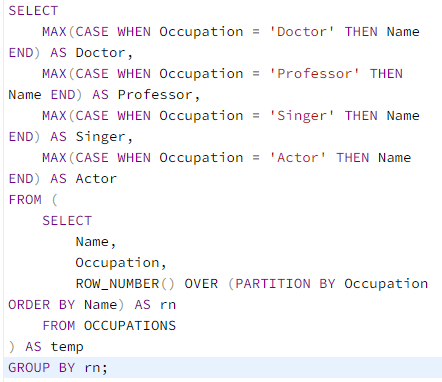

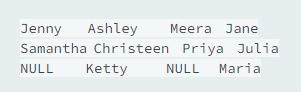

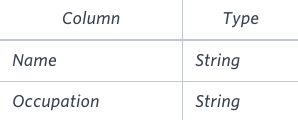

The  biggest difference among noraml aggragate functions in mysql such as GROUP BY and the window function such as OVER() clause or PARTITION BY or ROW_NUMBER() is that the window function gives us the result in a different way. I window function we get the number of rows equal to the actual number of rows in our data along with a new column which has the data or the output of the aggregate function attatched with each row. However, in normal aggragate function, we get the number of rows based on the number of groups created by our query.

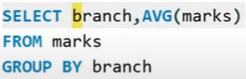

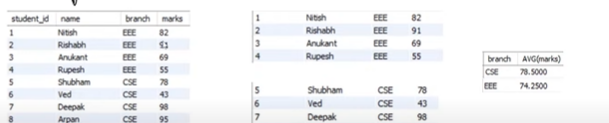

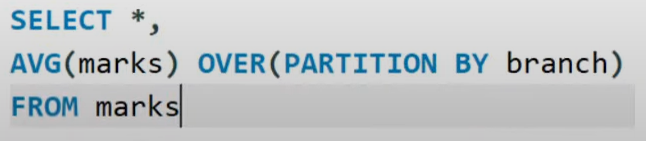

* **OVER()** clause creates a window in our dataset and the following commands are applies on this window giving us the result of our aggregate function along with all the other data with rows.

**Normal aggregate functions vs aggregate function through window function**

**1. AVG(MARKS) -**
* Normal aggregate function gives us just one row with the average marks. However, using AVG(MARKS) along with OVER() on the table gives us the complete table with an added column of average marks with same data in each row and avg marks will be same for all rows.
* We can also use PARTITION BY for partitioning the data on the basis on branch, let's say. In this case, we will get the average marks in the new column as avg marks for different branches. We can also do this on the basis of gender or section of class.

**NOTE -** You may see sorting in your data and this is not by default. To avoid this, we can use the ORDER BY clause on the primary key or the unique key indexing the table we are filtering data on.

We can also name these new columns created using OVER() and PARTITION BY clause along with any one aggregate function by using AS followed by the column name.




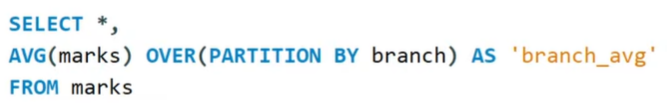

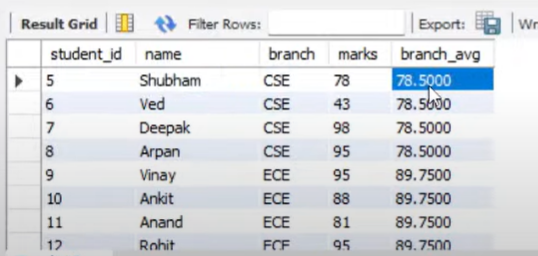

* As in the example above, we want the average marks for each branch but also want it to be associated with all the other data in sql only. The windows function is the solution for us in this situation.

***We can also apply conditional clauses on the window functions to filter the data even further on the basis of the aggrate function by using the concept of nested query, as shown in the example below.***

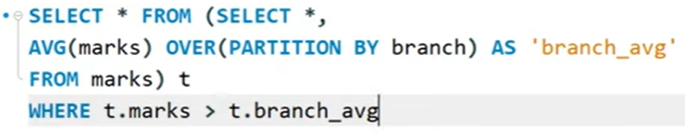

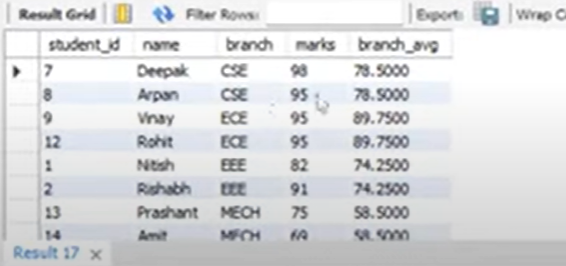

***Window function can be used with general aggregate function but we also have specific window function which helps us perform specific tasks with our data. The most important window functions will be discussed in this article one by one now.***

### **1. RANK()**
The RANK() function is used to sort the data based on the ranking applied on one of the columns in our dataset. We can apply this function on whole data and can also use the PARTITION BY clause for applying this function on different groups or windows created in our data using the PARTITION BY clause.

***a. RANK() on whole data***
We are here ranking the students based on their marks in descending order. The last column here is the rank. We can also name the rank column by using "AS" clause in SQL.

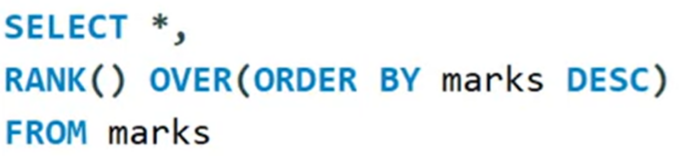

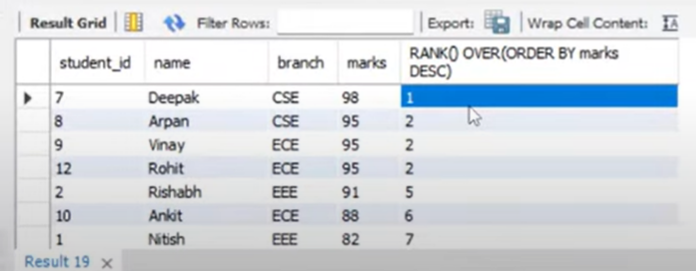

For ranking the students for each different brank, we can use the PARTITION BY clause just befor the ORDER BY clause in the above code.

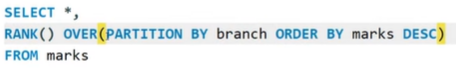

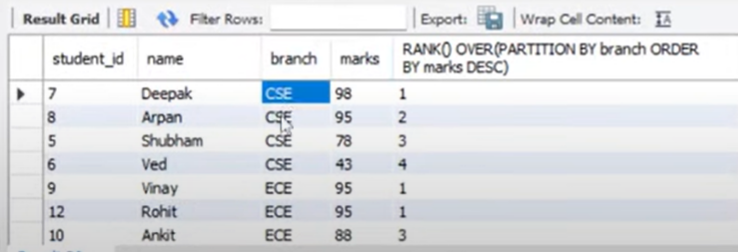

We can see that now students are ranked on the basis of their branch. However, one thing to notice here is that , in the ECE branch, we have 2 student ranked 1, but no student ranked 2.
This is one of the limitaitions of the RANK() function as when it start parsing the data row by row and find two consecutive rows ranked same, it skips the next rank number by the number equal to the rows marked with similar rank. Which mean, in our example, 23 students were marked rank 1, which means 1 extra student was ranked with same number, therefor, the RANK() function skipped one rank number, i.e., '2' and marked the following record with rank '3' instead of 2. Becasue of which, we do not have any student on position 2 in ECE branch for now. If there would have been 3 students with same numbers and rank 1, the following student would have given rank '4' and there would have been no student with rank '2' or '3'.

 ### **2. DENSE_RANK()**
The solution to the problem encountered with the RANK() function is provided by this another windows function , "DENSE_RANK()". This function works exactly same as RANK() to rank the data on the basis of specified column either on whole data or on the basis of the PARTITION BY clause if used in the query. However, if any two records are assigned same rank, the follwing record will be assigned the rank in a continuous manner. FOr example, in the students eample above, if 2 students are assigned rank '1', the third student will be assigned rank '2' unlike the RANK() function which would have skipped the rank '2' with rank '3' for that student. In this way, we do not miss or discontinue the rank counts in our dataset no matter what exception we get in terms of similar ranking for multiple records. An example of using this function in query can be seen below.

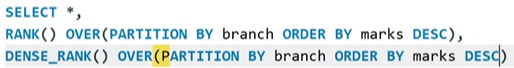

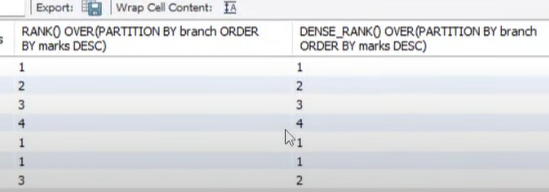

***We cam clearly see the difference in ranking by RANK() and DENSE_RANK() functions in the table***

 ### **3. ROW_NUMBER()**
 This is yet another window function we have, which simply assigns a number to each row. We can definitely use this along with the PARTITION BY clause for assigning row number for the records on the basis groups or partitions created on any one specified column. An example, a simple one can be given as"

 ***Assigning row numbers to students for each branch***

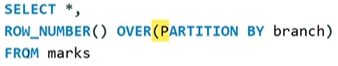

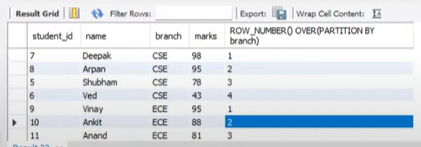

* We can use this function to create unique roll numbers for student for different branch where the roll number is the branch code followed by the uniue number, and we can achieve it using the CONCAT() function to concat or combine the data from one column along with the row number generated by the ROW_NUMBER() function through the following code.

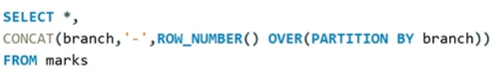



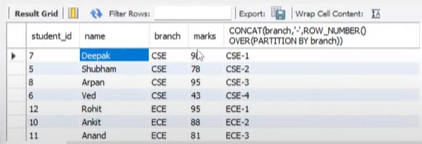

* ***Question 01 - Print the top 2 customers of zomato for every month. Also print all the details related to those customers. (Use Zomato Database)***

Ans - To print the top customers of Zomato for each month, we will use the Window Functions, as we are learning it. The table for fetching this data is ORDERS in the ZOMATO database. (This is just for your understanding for this article, as we cannot really get the database of ZOMATO for our practice)

We need to fetch
01. Top 2 Customers
02. For each month

For this, we have to group the orders once on the basis of customers, as there are more than one order for one customer (that is why we are ranking on that number). The other grouping would happen on the basis of month. Which will then give us the list of customers ranked by their orders for each month. This data shall then be filtered to get top 2 customers for each month.

Now, the query for this would look like this.

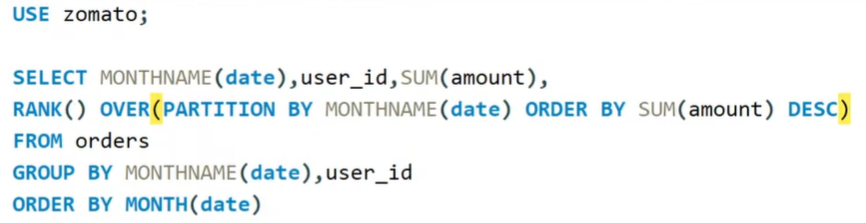

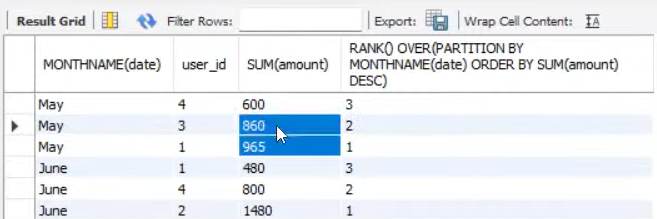